In [38]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [39]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization

In [40]:
model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:],kernel_initializer='orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),kernel_initializer='orthogonal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 256)     2560      
                                                                 
 batch_normalization_5 (Batc  (None, 222, 222, 256)    1024      
 hNormalization)                                                 
                                                                 
 activation_15 (Activation)  (None, 222, 222, 256)     0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 256)    0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 128)     295040    
                                                                 
 activation_16 (Activation)  (None, 109, 109, 128)    

In [41]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [42]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('models/model={epoch:03d}.h5',monitor='val_loss', save_best_only=True,mode='auto')

In [45]:

history= model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=10,callbacks=[checkpoint])
#history= model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=10)

Epoch 1/10
21/21 [==============================] - 132s 6s/step - loss: 0.0369 - accuracy: 0.9835 - val_loss: 0.4999 - val_accuracy: 0.9067
Epoch 2/10
21/21 [==============================] - 133s 6s/step - loss: 0.0252 - accuracy: 0.9910 - val_loss: 0.5159 - val_accuracy: 0.8400
Epoch 3/10
21/21 [==============================] - 133s 6s/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.4244 - val_accuracy: 0.8933
Epoch 4/10
21/21 [==============================] - 132s 6s/step - loss: 0.0164 - accuracy: 0.9925 - val_loss: 0.3240 - val_accuracy: 0.9333
Epoch 5/10
21/21 [==============================] - 131s 6s/step - loss: 0.0168 - accuracy: 0.9970 - val_loss: 0.3328 - val_accuracy: 0.9200
Epoch 6/10
21/21 [==============================] - 129s 6s/step - loss: 0.0173 - accuracy: 0.9970 - val_loss: 0.1417 - val_accuracy: 0.9867
Epoch 7/10
21/21 [==============================] - 129s 6s/step - loss: 0.0098 - accuracy: 0.9955 - val_loss: 0.2362 - val_accuracy: 0.9333
Epoch 8/10
21

In [46]:
model.save('CNNM422.h5')

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

ModuleNotFoundError: No module named 'matplotlib'

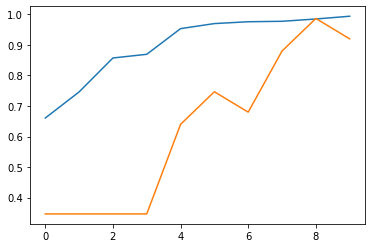

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [7]:
model.save('CNNM.h5')